# Overview

Every single person has been applied to get a loan, lease /finance a car or house/apartment at least once in his/her life and bond investors has to consider credit risk of each applicant. Credit risk which is also known as default risk is the risk that a bond issuer will default on their payments of interest and principal.
Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders. The goal of this project is to be able to predict the likelihood that an applicant will experience difficulty in repaying their loan.
The two most critical questions in the lending industry are:
- 1) How risky is the borrower? 
- 2) Given the borrower’s risk, should we lend him/her?
Business Objective: Home Credit Default Risk

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities. 
Home Credit needs an algorithm that will take as inputs various personal and alternative financial information originally taken from a loan applicant's profile, and then determine a probability of the applicant has at least one late payment when repaying their loan. This probability will be in the range [0.0, 1.0], where 1.0 represents a 100% certainty that the applicant will have at least one delinquent repayment and 0.0 indicates that there is zero chance that the applicant will ever be delinquent. 
The algorithm will be tested on a set of 48,744 individuals who previously borrowed from Home Credit. Home Credit knows which borrowers ultimately paid off their loans, and which ones had one or more late payments. A good algorithm will need to predict a high probability of delinquency for the majority of borrowers who did actually make one or more late payments. This algorithm will also need to predict a low probability of delinquency for the majority of borrowers who eventually did successfully repay their loans with no late payments.

 ## Data

The dataset as it is mentioned above was provided by Home Credit Group's data scientists. It contains a wide variety of personal and financial information belonging to 356,255 individuals who had previously been recipients of loans from Home Credit. These individuals are divided into training and testing sets. The training group contains 307,511 individuals' records. The test group contains 48,744 records.
 The dataset is anonymized, with each individual their loan ID. Any personally identifying, such as name, phone number, or address, has been omitted. Because Home Credit targets the unbanked population, it is unable to rely on traditional measures, such as a credit score, that mainstream financial institutions use when making lending decisions.
 Home Credit works around this obstacle by looking at an extensive and diverse array of personal and financial information for each of its applicants. These features range from common characteristics, such as marital status, age, type of housing, a region of residence, job type, and education level, to some incredible niche characteristics, such as how many elevators are in an applicant's apartment building. 
Home Credit also looks at aspects of applicants' financial backgrounds, including month-by-month payment performance on any loans or credit card balances that the applicant has previously had with Home Credit, as well as the amount and monthly repayment balances of any loans that the applicant may have received from other lenders. All of these features are spread across seven data tables. 
The main data table ('application_train.csv') contains 120 features that comprise applicants' personal background information. The other six data tables contain applicants' previous loan and credit card balance payment histories.  The following diagram provides a brief summary:

![My Title](data.png)


## Workflow
- Collecting data and applying data wrangling 
- Starting exploratory data analysis to find trends and Storytelling
- Conduct further data analysis to identify relationships between different variables
- Dimensionality reduction or Feature Selection
- Implement learning algorithms: Random Forest, Multi-layer Perceptron Classier, Logistic Regression Classier, Gaussian Naive Bayes Classier, AdaBoost Classier, Random Forest Classifier, Gradient Boosting Classier
- Model Evaluation and Validation



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import pandas.core.algorithms as algos
import scipy.stats.stats as stats
from sklearn.metrics import log_loss
from sklearn.metrics import average_precision_score
from sklearn.neural_network import MLPClassifier

In [2]:
df=pd.read_csv('application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 307511 observations and 122 features in this dataset. 



In [4]:
df=df.dropna(how='all')
df.shape

(307511, 122)

In [5]:
df.iloc[:,1:20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 19 columns):
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null object
CODE_GENDER                   307511 non-null object
FLAG_OWN_CAR                  307511 non-null object
FLAG_OWN_REALTY               307511 non-null object
CNT_CHILDREN                  307511 non-null int64
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307499 non-null float64
AMT_GOODS_PRICE               307233 non-null float64
NAME_TYPE_SUITE               306219 non-null object
NAME_INCOME_TYPE              307511 non-null object
NAME_EDUCATION_TYPE           307511 non-null object
NAME_FAMILY_STATUS            307511 non-null object
NAME_HOUSING_TYPE             307511 non-null object
REGION_POPULATION_RELATIVE    307511 non-null float64
DAYS_BIRTH                    307511 n

## Exploratory Data Analysis

0    282686
1     24825
Name: TARGET, dtype: int64


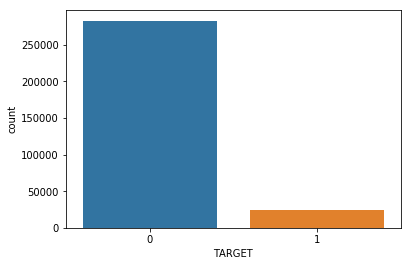

In [6]:
print(df['TARGET'].value_counts())
sns.countplot(df['TARGET'])
plt.show()

Target variable (1 - client with payment diffculties: he/she had late payment
more than X days on at least one of the first Y installments of the loan in our
sample, 0 - all other cases)
#### The 'TERGET' is very imbalanced which is normal and it means around 92% were cleared to get the loan.

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


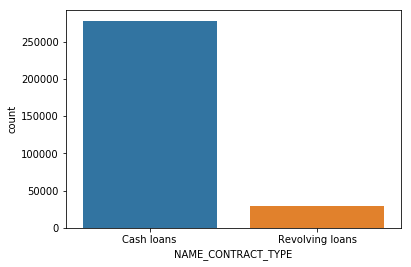

In [7]:
print(df['NAME_CONTRACT_TYPE'].value_counts())
sns.countplot(df['NAME_CONTRACT_TYPE'])
plt.show()

#### Around 90% of the contracts are 'Cash loans' and less than 10% are 'Revolving loans'

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


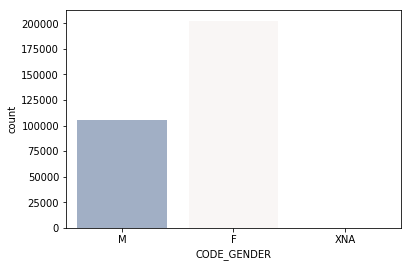

In [8]:
print(df['CODE_GENDER'].value_counts())
sns.countplot(df['CODE_GENDER'],palette="vlag")
plt.show()

In [9]:
a=df['CODE_GENDER'].value_counts()
a.M/(a.M+a.F)

0.34164750721121795

#### More then 66% of applicants are females.

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


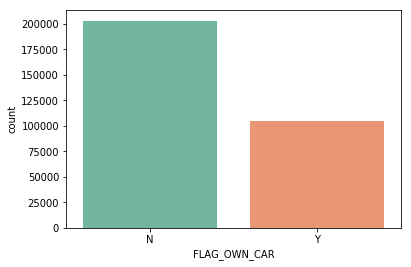

In [10]:
print(df['FLAG_OWN_CAR'].value_counts())
sns.countplot(df['FLAG_OWN_CAR'],palette="Set2")
plt.show()

In [11]:
a=df['FLAG_OWN_CAR'].value_counts()
a.N/(a.N+a.Y)

0.6598918412674668

Flag if the client owns a car
#### Around 66% of applicants do not have their own car.

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


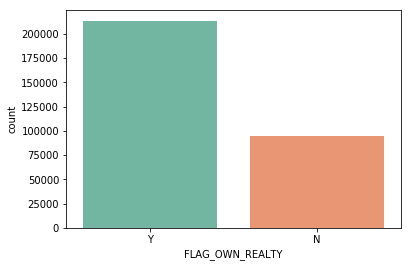

In [12]:
print(df['FLAG_OWN_REALTY'].value_counts())
sns.countplot(df['FLAG_OWN_REALTY'],palette="Set2")
plt.show()

In [13]:
a=df['FLAG_OWN_REALTY'].value_counts()
a.N/(a.N+a.Y)

0.30632725333402705

Flag if client owns a house or flat
#### Around 70% of the applicants have  their own realty.

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64


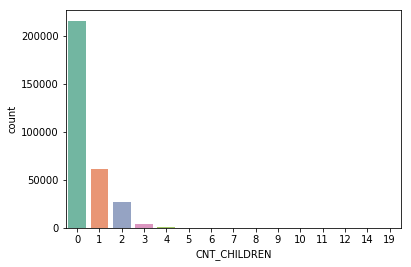

In [14]:
print(df['CNT_CHILDREN'].value_counts())
sns.countplot(df['CNT_CHILDREN'],palette="Set2")
plt.show() #Number of children the client has

In [15]:
df['AMT_INCOME_TOTAL'].describe()['mean']

168797.9192969845

#### The Average income is 168,798$

In [16]:
df['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [17]:
df['AMT_CREDIT'].describe()['mean']

599025.9997057016

#### The average Credit amount of the loan is 599,026$

In [18]:
df['AMT_GOODS_PRICE'].describe()['mean']

538396.2074288895

#### 'AMT_GOODS_PRICE': For consumer loans it is the price of the goods for which the loan is given

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


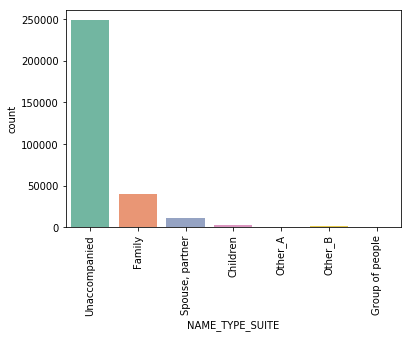

In [19]:
print(df['NAME_TYPE_SUITE'].value_counts())
sns.countplot(df['NAME_TYPE_SUITE'],palette="Set2")
plt.xticks(rotation=90)
plt.show() #Who was accompanying client when he was applying for the loan

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


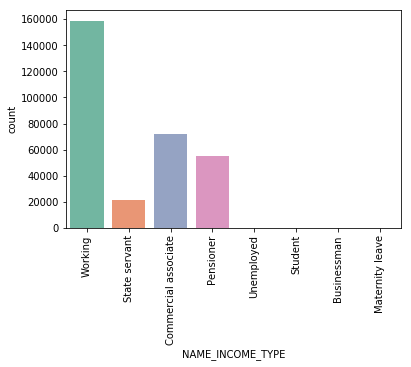

In [20]:
print(df['NAME_INCOME_TYPE'].value_counts())
sns.countplot(df['NAME_INCOME_TYPE'],palette="Set2")
plt.xticks(rotation=90)
plt.show() #Clients income type (businessman, working, maternity leave, ...)

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


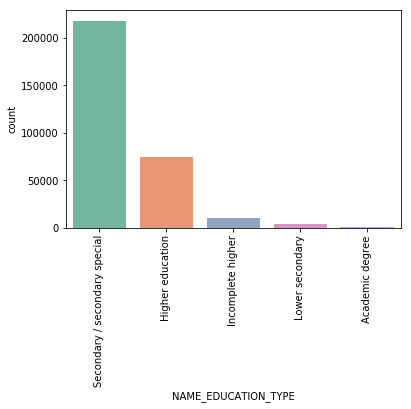

In [21]:
print(df['NAME_EDUCATION_TYPE'].value_counts())
sns.countplot(df['NAME_EDUCATION_TYPE'],palette="Set2")
plt.xticks(rotation=90)
plt.show() #Level of highest education the client achieved

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64


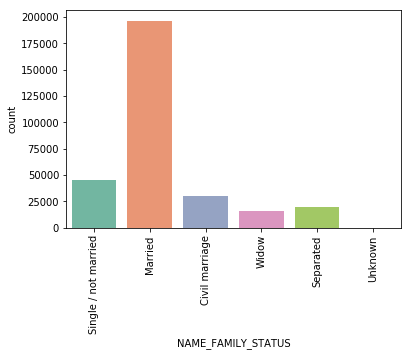

In [22]:
print(df['NAME_FAMILY_STATUS'].value_counts())
sns.countplot(df['NAME_FAMILY_STATUS'],palette="Set2")
plt.xticks(rotation=90)
plt.show() #Family status of the client

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64


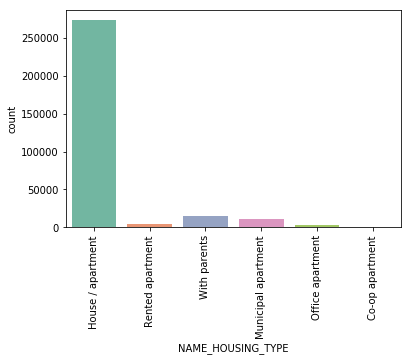

In [23]:
print(df['NAME_HOUSING_TYPE'].value_counts())
sns.countplot(df['NAME_HOUSING_TYPE'],palette="Set2")
plt.xticks(rotation=90)
plt.show() #What is the housing situation of the client (renting, living with parents, ...)

In [24]:
df['REGION_POPULATION_RELATIVE'].describe() 
#Normalized population of region where client lives (higher number means the client lives in more populated region)

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [25]:
df['DAYS_BIRTH'].describe()
#Client's age in days at the time of application-time only relative to the application

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [26]:
df['DAYS_EMPLOYED'].describe()
#How many days before the application the person started current employment-time only relative to the application

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

### Change columns with string values to integers

In [27]:
df=df[df['CODE_GENDER']!='XNA']
df['NAME_CONTRACT_TYPE']=pd.get_dummies(df['NAME_CONTRACT_TYPE'])['Cash loans']
df['CODE_GENDER']=pd.get_dummies(df['CODE_GENDER'])['F']
df['FLAG_OWN_CAR']=pd.get_dummies(df['FLAG_OWN_CAR'])['Y']
df['FLAG_OWN_REALTY']=pd.get_dummies(df['FLAG_OWN_REALTY'])['Y']
df.NAME_INCOME_TYPE = pd.Categorical(df.NAME_INCOME_TYPE)
df['NAME_INCOME_TYPE'] = df.NAME_INCOME_TYPE.cat.codes
df.NAME_EDUCATION_TYPE = pd.Categorical(df.NAME_EDUCATION_TYPE)
df['NAME_EDUCATION_TYPE'] = df.NAME_EDUCATION_TYPE.cat.codes
dict3={'Single / not married':0, 'Married':1, 'Civil marriage':2, 'Widow':3,
       'Separated':4, 'Unknown':5}
df['NAME_FAMILY_STATUS']=df['NAME_FAMILY_STATUS'].map(dict3)
dict4={'House / apartment':0, 'Rented apartment':1, 'With parents':2,
       'Municipal apartment':3, 'Office apartment':4, 'Co-op apartment':5}
df['NAME_HOUSING_TYPE']=df['NAME_HOUSING_TYPE'].map(dict4)
dict5={'WEDNESDAY':2, 'MONDAY':0, 'THURSDAY':3, 'SUNDAY':6, 'SATURDAY':5, 'FRIDAY':4,
       'TUESDAY':1}
df['WEEKDAY_APPR_PROCESS_START']=df['WEEKDAY_APPR_PROCESS_START'].map(dict5)
dict6={'Business Entity Type 3':0, 'School':1, 'Government':2, 'Religion':3,
       'Other':4, 'XNA':5, 'Electricity':6, 'Medicine':7,
       'Business Entity Type 2':8, 'Self-employed':9, 'Transport: type 2':10,
       'Construction':11, 'Housing':12, 'Kindergarten':13, 'Trade: type 7':14,
       'Industry: type 11':15, 'Military':16, 'Services':17, 'Security Ministries':18,
       'Transport: type 4':19, 'Industry: type 1':20, 'Emergency':21, 'Security':22,
       'Trade: type 2':23, 'University':24, 'Transport: type 3':25, 'Police':26,
       'Business Entity Type 1':27, 'Postal':28, 'Industry: type 4':29,
       'Agriculture':30, 'Restaurant':31, 'Culture':32, 'Hotel':33,
       'Industry: type 7:':34, 'Trade: type 3':35, 'Industry: type 3':36, 'Bank':37,
       'Industry: type 9':38, 'Insurance':39, 'Trade: type 6':40,
       'Industry: type 2':41, 'Transport: type 1':42, 'Industry: type 12':43,
       'Mobile':57, 'Trade: type 1':44, 'Industry: type 5':45, 'Industry: type 10':46,
       'Legal Services':47, 'Advertising':48, 'Trade: type 5':49, 'Cleaning':50,
       'Industry: type 13':51, 'Trade: type 4':52, 'Telecom':53,
       'Industry: type 8':54, 'Realtor':55, 'Industry: type 6':56}
df['ORGANIZATION_TYPE']=df['ORGANIZATION_TYPE'].map(dict6)
dict7={'Unaccompanied':0, 'Family':1, 'Spouse, partner':2, 'Children':3,
       'Other_A':4,  'Other_B':5, 'Group of people':6}
df['NAME_TYPE_SUITE']=df['NAME_TYPE_SUITE'].map(dict7)
dict8={'Laborers':0, 'Core staff':1, 'Accountants':2, 'Managers':3, 
       'Drivers':4, 'Sales staff':5, 'Cleaning staff':6, 'Cooking staff':7,
       'Private service staff':8, 'Medicine staff':9, 'Security staff':10,
       'High skill tech staff':11, 'Waiters/barmen staff':12,
       'Low-skill Laborers':13, 'Realty agents':14, 'Secretaries':15, 'IT staff':16,
       'HR staff':17}
df['OCCUPATION_TYPE']=df['OCCUPATION_TYPE'].map(dict8)
dict9={'reg oper account':0,'org spec account':1,
       'reg oper spec account':2, 'not specified':3}
df['FONDKAPREMONT_MODE']=df['FONDKAPREMONT_MODE'].map(dict9)
dict10={'block of flats':0, 'terraced house':1, 'specific housing':2}
df['HOUSETYPE_MODE']=df['HOUSETYPE_MODE'].map(dict10)
dict11={'Stone, brick':0, 'Block':1,'Panel':2, 'Mixed':3, 'Wooden':4, 'Others':5,
       'Monolithic':6}
df['WALLSMATERIAL_MODE']=df['WALLSMATERIAL_MODE'].map(dict11)
dict12={'No':0, 'Yes':1}
df['EMERGENCYSTATE_MODE']=df['EMERGENCYSTATE_MODE'].map(dict12)

## Handling missing values and Feature selecion

### Percent missing values

In [28]:
desc=df.describe().T
desc['missing %']=1-(desc['count']/len(df))

#### Remove the columns with more than 50% missing value

In [29]:
df.drop(list(desc[desc['missing %']>0.5]['missing %'].index),axis=1,inplace=True)

### Check the variance of each column

#### Remove the columns with very small variance

In [30]:
df.drop(list(desc[desc['std']<0.005]['std'].index),inplace=True,axis=1)

### Correlation with the Target

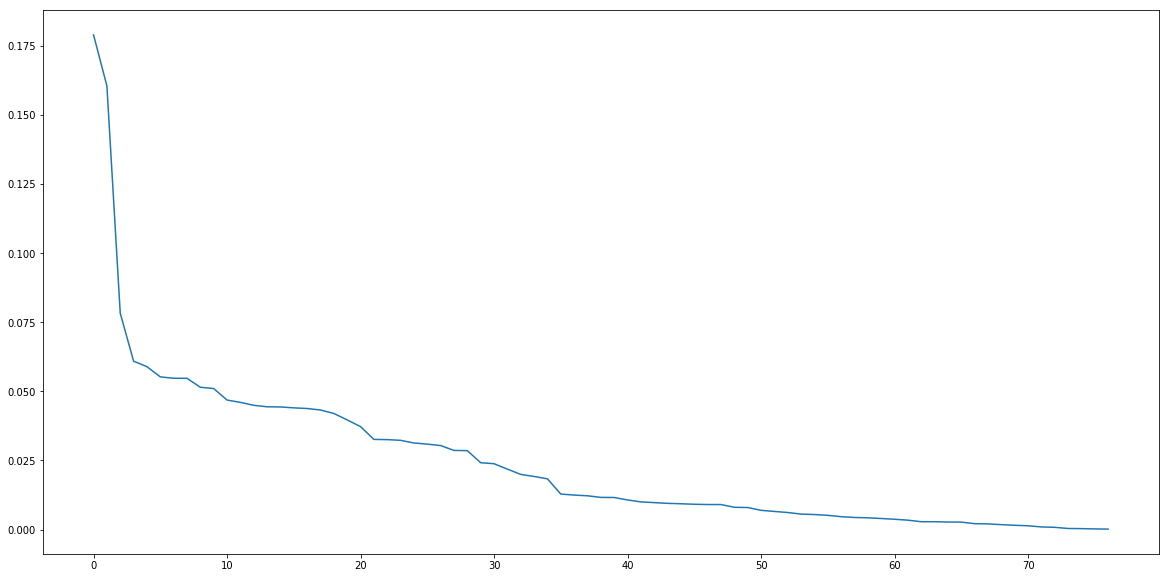

In [31]:
Corr1=abs(df.corr()['TARGET'])

plt.figure(figsize=(20,10))
plt.plot(Corr1.drop('TARGET').sort_values(ascending=False).reset_index()['TARGET'])
plt.show()

#### The elbow point is around 35

In [32]:
Corr1.sort_values(ascending=False)[1:35].index

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE',
       'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'NAME_INCOME_TYPE',
       'FLAG_EMP_PHONE', 'DAYS_EMPLOYED', 'REG_CITY_NOT_LIVE_CITY',
       'FLAG_DOCUMENT_3', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE',
       'DAYS_REGISTRATION', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'TOTALAREA_MODE', 'LIVE_CITY_NOT_WORK_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT',
       'FLAG_DOCUMENT_6', 'FLAG_WORK_PHONE', 'HOUR_APPR_PROCESS_START',
       'FLAG_PHONE', 'FLAG_OWN_CAR', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'CNT_CHILDREN'],
      dtype='object')

#### Pick the most correlated columns with Target

In [33]:
df=df[['TARGET','EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'NAME_INCOME_TYPE', 'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER',
       'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE',
       'DAYS_EMPLOYED', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3',
       'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE',
       'DAYS_REGISTRATION', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'TOTALAREA_MODE', 'LIVE_CITY_NOT_WORK_CITY', 'NAME_EDUCATION_TYPE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'FLAG_DOCUMENT_6',
       'FLAG_WORK_PHONE', 'HOUR_APPR_PROCESS_START', 'FLAG_PHONE',
       'FLAG_OWN_CAR', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_CHILDREN']]

Feature Selection steps:
- **I removed the columns with more than 50% NaN values (41 columns)**
- **I removed the columns with variance less than 0.005 (3 columns) **
- **I found the correclation of the remaining columns with the Target, I plot them in ascending order, I found the elbow point which was around 35, and I picked the first 35th columns with higher correlation with the Target.**

- 'EXT_SOURCE_3', 'EXT_SOURCE_2': Normalized score from external data source-normalized
- 'DAYS_BIRTH': Client's age in days at the time of application-time only relative to the application
- REGION RATING_CLIENT_W_CITY: Our rating of the region where client lives with taking city into account (1,2,3)
- NAME INCOME TYPE: Clients income type (businessman, working, maternity leave)

2    229481
3     43859
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64


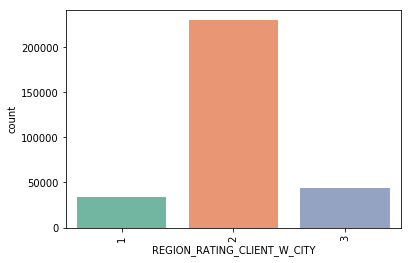

In [34]:
print(df['REGION_RATING_CLIENT_W_CITY'].value_counts())
sns.countplot(df['REGION_RATING_CLIENT_W_CITY'],palette="Set2")
plt.xticks(rotation=90)
plt.show() 

### Outlier detection
#### Checking the columns with outliers (Start with columns with high variance)


In [35]:
df.describe().T['std'].sort_values(ascending=False)

AMT_CREDIT                     402492.601859
AMT_GOODS_PRICE                369447.246462
DAYS_EMPLOYED                  141276.472519
DAYS_BIRTH                       4363.982424
DAYS_REGISTRATION                3522.883030
DAYS_ID_PUBLISH                  1509.454566
DAYS_LAST_PHONE_CHANGE            826.811491
HOUR_APPR_PROCESS_START             3.265835
NAME_INCOME_TYPE                    2.544523
AMT_REQ_CREDIT_BUREAU_YEAR          1.869286
NAME_EDUCATION_TYPE                 1.298753
CNT_CHILDREN                        0.722119
REGION_RATING_CLIENT                0.509034
REGION_RATING_CLIENT_W_CITY         0.502737
CODE_GENDER                         0.474263
FLAG_OWN_CAR                        0.473745
FLAG_DOCUMENT_3                     0.453748
FLAG_PHONE                          0.449516
DEF_30_CNT_SOCIAL_CIRCLE            0.446644
REG_CITY_NOT_WORK_CITY              0.421126
FLAG_WORK_PHONE                     0.399518
FLAG_EMP_PHONE                      0.384282
LIVE_CITY_

### Checking the outliers

#### I just plot the outliers of each selected feature in next section, but do not remove them. I assume for now that  they are providing intresting trends and they are not outliers by mistake or a noise.

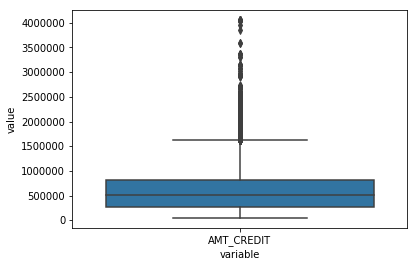

In [36]:
df1 = pd.DataFrame(data = df, columns = ['AMT_CREDIT'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

#Q1 = df['AMT_CREDIT'].quantile(0.25)
#Q3 = df['AMT_CREDIT'].quantile(0.75)
#IQR = Q3 - Q1
#MAX=Q3+1.5*IQR
#df['AMT_CREDIT']= df['AMT_CREDIT'].mask(df['AMT_CREDIT'] >MAX,df['AMT_CREDIT'].median())

#df1 = pd.DataFrame(data = df, columns = ['AMT_CREDIT'])
#sns.boxplot(x="variable", y="value", data=pd.melt(df1))
#plt.show()

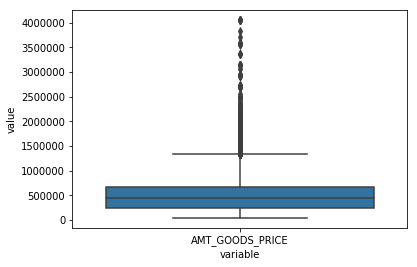

In [37]:
df1 = pd.DataFrame(data = df, columns = ['AMT_GOODS_PRICE'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

#Q1 = df['AMT_GOODS_PRICE'].quantile(0.25)
#Q3 = df['AMT_GOODS_PRICE'].quantile(0.75)
#IQR = Q3 - Q1
#MAX=Q3+1.5*IQR
#df['AMT_GOODS_PRICE']= df['AMT_GOODS_PRICE'].mask(df['AMT_GOODS_PRICE'] >MAX, df['AMT_GOODS_PRICE'].median())

#df1 = pd.DataFrame(data = df, columns = ['AMT_GOODS_PRICE'])
#sns.boxplot(x="variable", y="value", data=pd.melt(df1))
#plt.show()

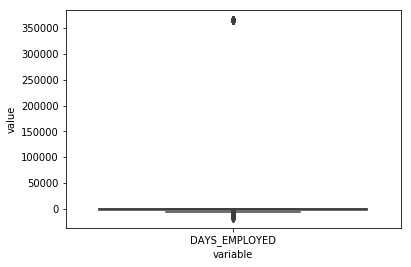

In [38]:
df1 = pd.DataFrame(data = df, columns = ['DAYS_EMPLOYED'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

#Q1 = df['DAYS_EMPLOYED'].quantile(0.25)
#Q3 = df['DAYS_EMPLOYED'].quantile(0.75)
#IQR = Q3 - Q1
#MIN=Q1-1.5*IQR

#df['DAYS_EMPLOYED']= df['DAYS_EMPLOYED'].mask(df['DAYS_EMPLOYED'] <MIN, df['DAYS_EMPLOYED'].median())

#df1 = pd.DataFrame(data = df, columns = ['DAYS_EMPLOYED'])
#sns.boxplot(x="variable", y="value", data=pd.melt(df1))
#plt.show()

In [39]:
df.DAYS_EMPLOYED.describe()

count    307507.000000
mean      63815.929208
std      141276.472519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

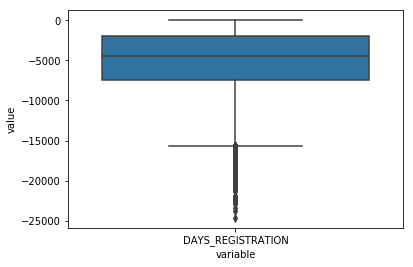

In [40]:
df1 = pd.DataFrame(data = df, columns = ['DAYS_REGISTRATION'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()


#Q1 = df['DAYS_REGISTRATION'].quantile(0.25)
#Q3 = df['DAYS_REGISTRATION'].quantile(0.75)
#IQR = Q3 - Q1
#MIN=Q1-1.5*IQR
#df['DAYS_REGISTRATION']= df['DAYS_REGISTRATION'].mask(df['DAYS_REGISTRATION']<MIN, df['DAYS_REGISTRATION'].median())


#df1 = pd.DataFrame(data = df, columns = ['DAYS_REGISTRATION'])
#sns.boxplot(x="variable", y="value", data=pd.melt(df1))
#plt.show()


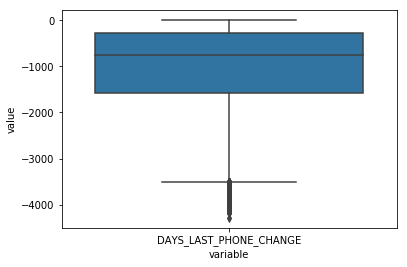

In [41]:
df1 = pd.DataFrame(data = df, columns = ['DAYS_LAST_PHONE_CHANGE'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()


#Q1 = df['DAYS_LAST_PHONE_CHANGE'].quantile(0.25)
#Q3 = df['DAYS_LAST_PHONE_CHANGE'].quantile(0.75)
#IQR = Q3 - Q1
#MIN=Q1-1.5*IQR
#df['DAYS_LAST_PHONE_CHANGE']= df['DAYS_LAST_PHONE_CHANGE'].mask(df['DAYS_LAST_PHONE_CHANGE']<MIN, df['DAYS_LAST_PHONE_CHANGE'].median())

#df1 = pd.DataFrame(data = df, columns = ['DAYS_LAST_PHONE_CHANGE'])
#sns.boxplot(x="variable", y="value", data=pd.melt(df1))
#plt.show()

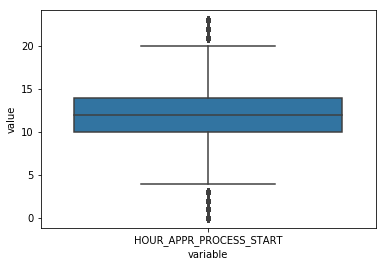

In [42]:
df1 = pd.DataFrame(data = df, columns = ['HOUR_APPR_PROCESS_START'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

#Q1 = df['HOUR_APPR_PROCESS_START'].quantile(0.25)
#Q3 = df['HOUR_APPR_PROCESS_START'].quantile(0.75)
#IQR = Q3 - Q1
#MIN=Q1-1.5*IQR
#MAX=Q3+1.5*IQR
#df['HOUR_APPR_PROCESS_START']= df['HOUR_APPR_PROCESS_START'].mask(df['HOUR_APPR_PROCESS_START']<MIN 
                                                                # , df['HOUR_APPR_PROCESS_START'].median())


#df['HOUR_APPR_PROCESS_START']= df['HOUR_APPR_PROCESS_START'].mask(df['HOUR_APPR_PROCESS_START']>MAX
                                                                 # , df['HOUR_APPR_PROCESS_START'].median())
#df1 = pd.DataFrame(data = df, columns = ['HOUR_APPR_PROCESS_START'])
#sns.boxplot(x="variable", y="value", data=pd.melt(df1))
#plt.show()

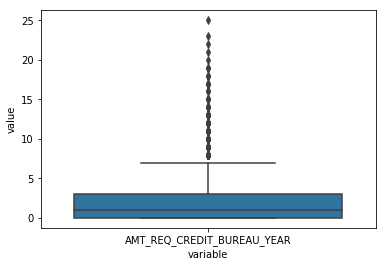

In [43]:
df1 = pd.DataFrame(data = df, columns = ['AMT_REQ_CREDIT_BUREAU_YEAR'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

#Q1 = df['AMT_REQ_CREDIT_BUREAU_YEAR'].quantile(0.25)
#Q3 = df['AMT_REQ_CREDIT_BUREAU_YEAR'].quantile(0.75)
#IQR = Q3 - Q1
#MIN=Q1-1.5*IQR
#MAX=Q3+1.5*IQR
#df['AMT_REQ_CREDIT_BUREAU_YEAR']= df['AMT_REQ_CREDIT_BUREAU_YEAR'].mask(df['AMT_REQ_CREDIT_BUREAU_YEAR']>MAX
                                                                 # , df['AMT_REQ_CREDIT_BUREAU_YEAR'].median())
#df1 = pd.DataFrame(data = df, columns = ['AMT_REQ_CREDIT_BUREAU_YEAR'])
#sns.boxplot(x="variable", y="value", data=pd.melt(df1))
#plt.show()

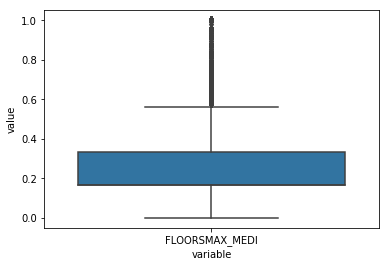

In [44]:
df1 = pd.DataFrame(data = df, columns = ['FLOORSMAX_MEDI'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

#Q1 = df['FLOORSMAX_MEDI'].quantile(0.25)
#Q3 = df['FLOORSMAX_MEDI'].quantile(0.75)
#IQR = Q3 - Q1
#MIN=Q1-1.5*IQR
#MAX=Q3+1.5*IQR

#df['FLOORSMAX_MEDI']= df['FLOORSMAX_MEDI'].mask(df['FLOORSMAX_MEDI']>MAX, df['FLOORSMAX_MEDI'].median())

#df1 = pd.DataFrame(data = df, columns =['FLOORSMAX_MEDI'])
#sns.boxplot(x="variable", y="value", data=pd.melt(df1))
#plt.show()

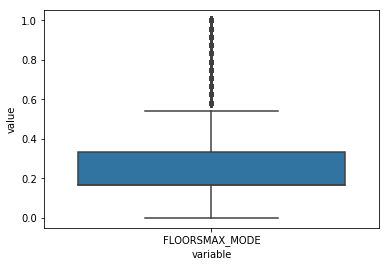

In [45]:
df1 = pd.DataFrame(data = df, columns = ['FLOORSMAX_MODE'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

#Q1 = df['FLOORSMAX_MODE'].quantile(0.25)
#Q3 = df['FLOORSMAX_MODE'].quantile(0.75)
#IQR = Q3 - Q1
#MIN=Q1-1.5*IQR
#MAX=Q3+1.5*IQR

#df['FLOORSMAX_MODE']= df['FLOORSMAX_MODE'].mask(df['FLOORSMAX_MODE']>MAX, df['FLOORSMAX_MODE'].median())

#df1 = pd.DataFrame(data = df, columns =['FLOORSMAX_MODE'])
#sns.boxplot(x="variable", y="value", data=pd.melt(df1))
#plt.show()

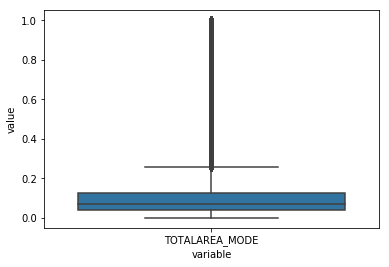

In [46]:
df1 = pd.DataFrame(data = df, columns = ['TOTALAREA_MODE'])
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

#Q1 = df['TOTALAREA_MODE'].quantile(0.25)
#Q3 = df['TOTALAREA_MODE'].quantile(0.75)
#IQR = Q3 - Q1
#MIN=Q1-1.5*IQR
#MAX=Q3+1.5*IQR

#df['TOTALAREA_MODE']= df['TOTALAREA_MODE'].mask(df['TOTALAREA_MODE']>MAX, df['TOTALAREA_MODE'].median())

#df1 = pd.DataFrame(data = df, columns =['TOTALAREA_MODE'])
#sns.boxplot(x="variable", y="value", data=pd.melt(df1))
#plt.show()


### Fill NaN values

In [47]:
df.describe().T[['min','max']]

,min,max
TARGET,0.000000e+00,1.000000e+00
EXT_SOURCE_3,5.272652e-04,8.960095e-01
EXT_SOURCE_2,8.173617e-08,8.549997e-01
DAYS_BIRTH,-2.522900e+04,-7.489000e+03
REGION_RATING_CLIENT_W_CITY,1.000000e+00,3.000000e+00
REGION_RATING_CLIENT,1.000000e+00,3.000000e+00
NAME_INCOME_TYPE,0.000000e+00,7.000000e+00
DAYS_LAST_PHONE_CHANGE,-4.292000e+03,0.000000e+00
CODE_GENDER,0.000000e+00,1.000000e+00
DAYS_ID_PUBLISH,-7.197000e+03,0.000000e+00


#### Fill NaN values of columns with float values with average, Fill NaN values of columns with integer values with the max value counts

In [48]:
col1=['EXT_SOURCE_3','EXT_SOURCE_2','DAYS_BIRTH','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_EMPLOYED','FLOORSMAX_MEDI',
       'FLOORSMAX_MODE','DAYS_REGISTRATION','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','TOTALAREA_MODE','DEF_30_CNT_SOCIAL_CIRCLE',
      'DEF_60_CNT_SOCIAL_CIRCLE','AMT_CREDIT','HOUR_APPR_PROCESS_START','FLOORSMAX_AVG']
col2=['REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','NAME_INCOME_TYPE','CODE_GENDER','REG_CITY_NOT_WORK_CITY','FLAG_EMP_PHONE','REG_CITY_NOT_LIVE_CITY'
      'FLAG_DOCUMENT_3','LIVE_CITY_NOT_WORK_CITY','NAME_EDUCATION_TYPE','NAME_CONTRACT_TYPE','FLAG_DOCUMENT_6','FLAG_WORK_PHONE',
      'FLAG_PHONE','FLAG_OWN_CAR','AMT_REQ_CREDIT_BUREAU_YEAR','CNT_CHILDREN']

In [49]:
df[col1]=df[col1].fillna(df[col1].mean())

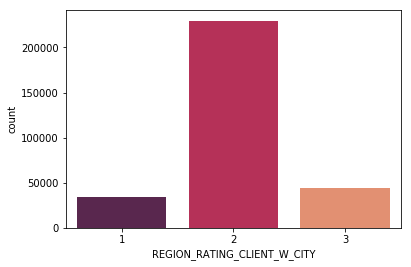

In [50]:
sns.countplot(df['REGION_RATING_CLIENT_W_CITY'],palette='rocket')
plt.show()

df['REGION_RATING_CLIENT_W_CITY']=df['REGION_RATING_CLIENT_W_CITY'].fillna(2)

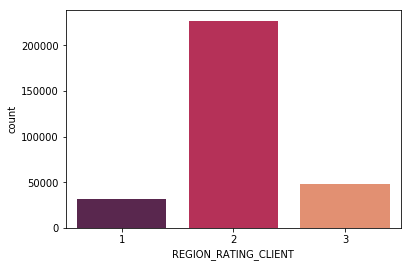

In [51]:
sns.countplot(df['REGION_RATING_CLIENT'],palette='rocket')
plt.show()

df['REGION_RATING_CLIENT']=df['REGION_RATING_CLIENT'].fillna(2)

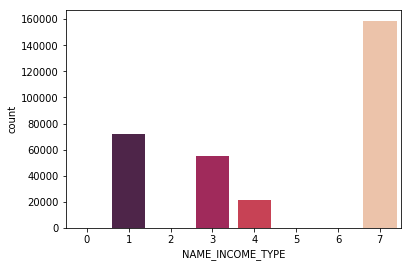

In [52]:
sns.countplot(df['NAME_INCOME_TYPE'],palette='rocket')
plt.show()
df['NAME_INCOME_TYPE']=df['NAME_INCOME_TYPE'].fillna(0)

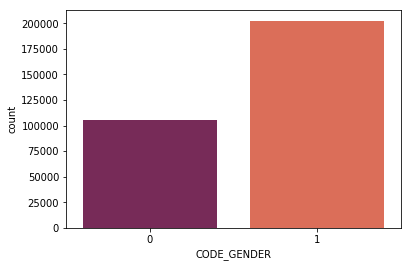

In [53]:
sns.countplot(df['CODE_GENDER'],palette='rocket')
plt.show()
df['NAME_INCOME_TYPE']=df['NAME_INCOME_TYPE'].fillna(1)

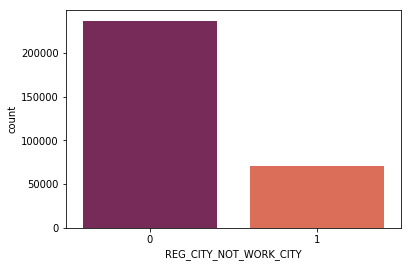

In [54]:
sns.countplot(df['REG_CITY_NOT_WORK_CITY'],palette='rocket')
plt.show()
df['REG_CITY_NOT_WORK_CITY']=df['REG_CITY_NOT_WORK_CITY'].fillna(0)

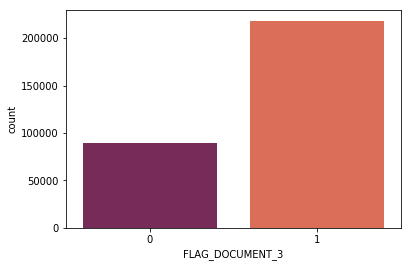

In [55]:
sns.countplot(df['FLAG_DOCUMENT_3'],palette='rocket')
plt.show()
df['FLAG_DOCUMENT_3']=df['FLAG_DOCUMENT_3'].fillna(1)

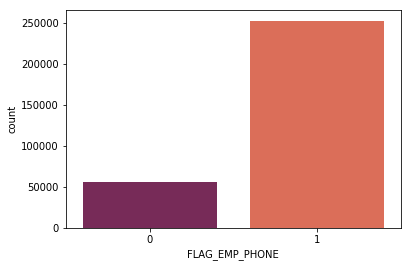

In [56]:
sns.countplot(df['FLAG_EMP_PHONE'],palette='rocket')
plt.show()
df['FLAG_EMP_PHONE']=df['FLAG_EMP_PHONE'].fillna(1)

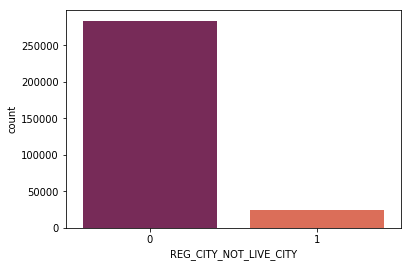

In [57]:
sns.countplot(df['REG_CITY_NOT_LIVE_CITY'],palette='rocket')
plt.show()
df['REG_CITY_NOT_LIVE_CITY']=df['REG_CITY_NOT_LIVE_CITY'].fillna(0)

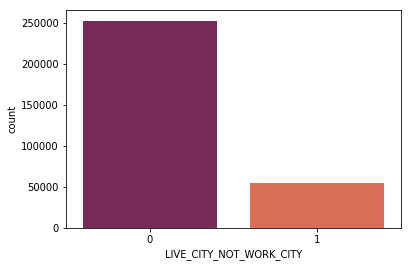

In [58]:
sns.countplot(df['LIVE_CITY_NOT_WORK_CITY'],palette='rocket')
plt.show()
df['LIVE_CITY_NOT_WORK_CITY']=df['LIVE_CITY_NOT_WORK_CITY'].fillna(0)

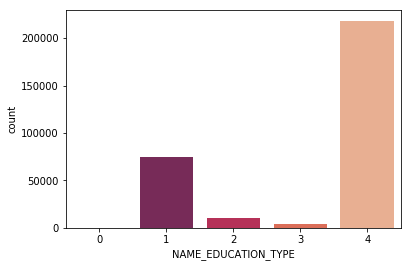

In [59]:
sns.countplot(df['NAME_EDUCATION_TYPE'],palette='rocket')
plt.show()
df['NAME_EDUCATION_TYPE']=df['NAME_EDUCATION_TYPE'].fillna(0)

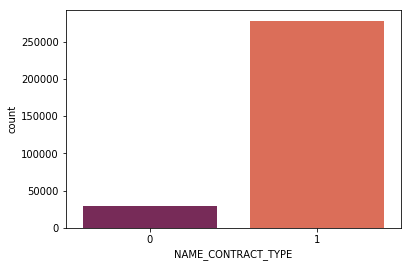

In [60]:
sns.countplot(df['NAME_CONTRACT_TYPE'],palette='rocket')
plt.show()
df['NAME_CONTRACT_TYPE']=df['NAME_CONTRACT_TYPE'].fillna(1)

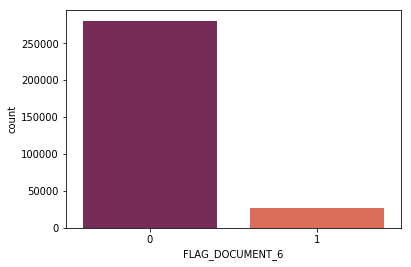

In [61]:
sns.countplot(df['FLAG_DOCUMENT_6'],palette='rocket')
plt.show()
df['FLAG_DOCUMENT_6']=df['FLAG_DOCUMENT_6'].fillna(0)

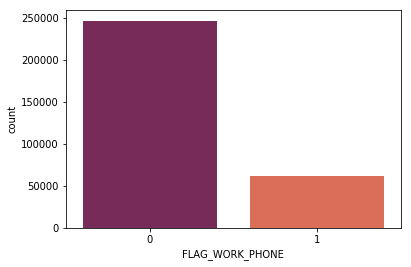

In [62]:
sns.countplot(df['FLAG_WORK_PHONE'],palette='rocket')
plt.show()
df['FLAG_WORK_PHONE']=df['FLAG_WORK_PHONE'].fillna(0)

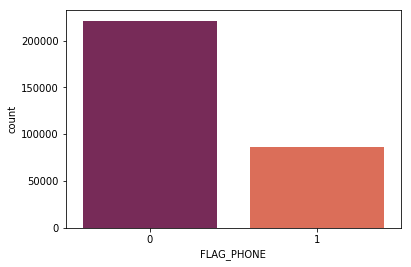

In [63]:
sns.countplot(df['FLAG_PHONE'],palette='rocket')
plt.show()
df['FLAG_PHONE']=df['FLAG_PHONE'].fillna(0)

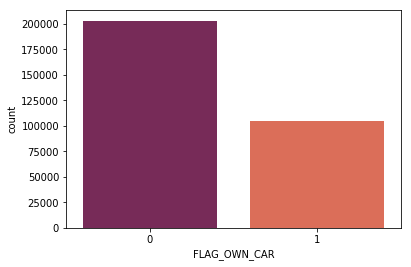

In [64]:
sns.countplot(df['FLAG_OWN_CAR'],palette='rocket')
plt.show()
df['FLAG_OWN_CAR']=df['FLAG_OWN_CAR'].fillna(0)

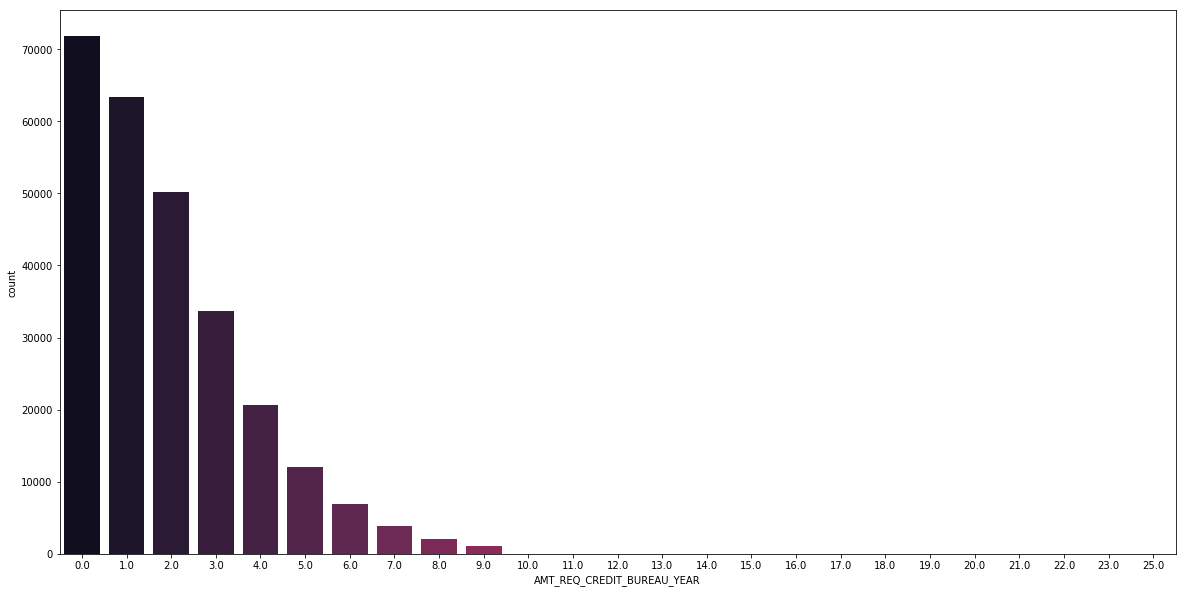

In [65]:
plt.figure(figsize=(20,10))
sns.countplot(df['AMT_REQ_CREDIT_BUREAU_YEAR'],palette="rocket")
plt.show()
df['AMT_REQ_CREDIT_BUREAU_YEAR']=df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0)

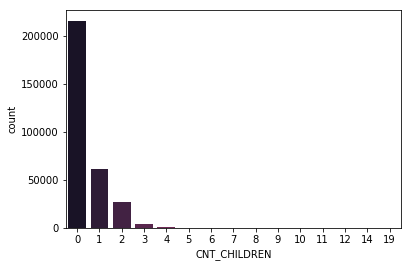

In [66]:
sns.countplot(df['CNT_CHILDREN'],palette="rocket")
plt.show()
df['CNT_CHILDREN']=df['CNT_CHILDREN'].fillna(0)

# Classification


#### Split Train dataset for training process (The X_test, y_test is like a validation step in the whole process.)

In [67]:
Train=df
X=Train.drop('TARGET',axis=1)
y=Train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

In [68]:
y.value_counts()

0    282682
1     24825
Name: TARGET, dtype: int64

## 1. Logistic Regression

In [69]:
LogClassifier= LogisticRegression()
start=time.time()
LogClassifier.fit(X_train, y_train)
end=time.time()
y_pred=LogClassifier.predict(X_test)
y_pred_prob=LogClassifier.predict_proba(X_test)[:, 1]
y_train_pred_prob=LogClassifier.predict_proba(X_train)[:, 1]

print('Correct accuracy of the train set with Logistic Regression is:', round(LogClassifier.score(X_train,y_train)*100,4),'%')
print('Correct accuracy of the test set with Logistic Regression is:', round(LogClassifier.score(X_test,y_test)*100,4),'%')
print('')
print('Total elapsed time is:', round(end-start,4),' sec')
#start=time.time()
LogScores = cross_val_score(LogClassifier, X, y, cv=5)
end=time.time()
print('Logistic Regression score mean with cross val is:',round(np.mean(LogScores)*100,4),'%')
print('Total elapsed time is:', round(end-start,4),' sec')
print('')
print('Confusion Matrix is:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Logistic Regression log_loss is:',round(log_loss(y_test, y_pred),4))

average_precision = average_precision_score(y_test, y_pred)
print('')
print('Average precision-recall score: {0:0.4f}'.format(average_precision))

Correct accuracy of the train set with Logistic Regression is: 91.9142 %
Correct accuracy of the test set with Logistic Regression is: 91.9309 %

Total elapsed time is: 10.0555  sec
Logistic Regression score mean with cross val is: 91.926 %
Total elapsed time is: 37.1042  sec

Confusion Matrix is:
[[84753    67]
 [ 7377    56]]

Logistic Regression log_loss is: 2.787

Average precision-recall score: 0.0834


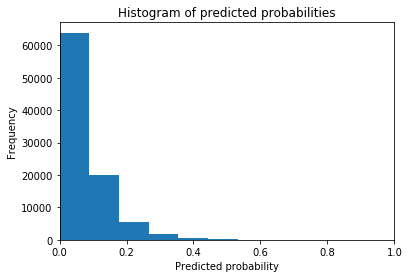

In [70]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')
plt.show()

In [71]:
# predict diabetes if the predicted probability is greater than 0.1
from sklearn.preprocessing import binarize
y_pred= binarize([y_pred_prob], 0.1)[0]

# new confusion matrix (threshold of 0.1)
print(metrics.confusion_matrix(y_test, y_pred))

[[65113 19707]
 [ 3131  4302]]


**Conclusion:**

- **Threshold of 0.5** is used by default (for binary problems) to convert predicted probabilities into class predictions
- Threshold can be **adjusted** to increase sensitivity or specificity


### Compute ROC Curve  and Area Under the Curve (AUC)

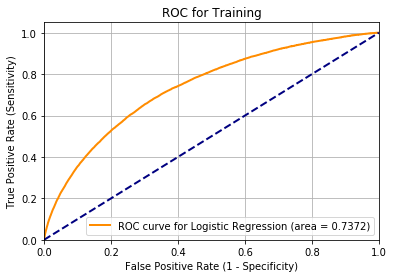

In [72]:
fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for Logistic Regression (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Training')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

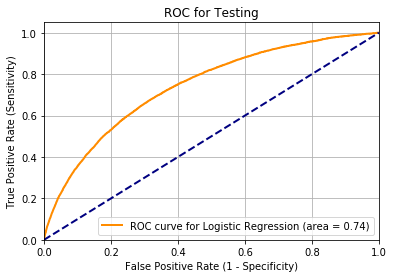

In [73]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Testing')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

- ROC curve can help you to **choose a threshold** that balances sensitivity and specificity in a way that makes sense for your particular context
- You can't actually **see the thresholds** used to generate the curve on the ROC curve itself

In [74]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [75]:
evaluate_threshold(0.1)

Sensitivity: 0.5787703484461186
Specificity: 0.7677198773874087


AUC is the **percentage** of the ROC plot that is **underneath the curve**:

In [76]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred))

0.6732156387361459


#### calculate cross-validated AUC

- AUC is useful as a **single number summary** of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a **higher predicted probability** to the positive observation.
- AUC is useful even when there is **high class imbalance** (unlike classification accuracy).

## 2. Random Forest

In [77]:
RandClassifier= RandomForestClassifier()
start=time.time()
RandClassifier.fit(X_train, y_train)
end=time.time()
y_pred=RandClassifier.predict(X_test)
y_pred_prob=RandClassifier.predict_proba(X_test)[:, 1]
y_train_pred_prob=RandClassifier.predict_proba(X_train)[:, 1]
print('Total elapsed time is:', round(end-start,4),' sec')
print('Correct accuracy of the train set with Random Forest Classifier is:', round(RandClassifier.score(X_train,y_train)*100,4),'%')
print('Correct accuracy of the test set with Random Forest Classifier is:', round(RandClassifier.score(X_test,y_test)*100,4),'%')
print('')
start=time.time()
RandScores = cross_val_score(RandClassifier, X, y, cv=5)
end=time.time()
print('Random Forest score mean with cross val is:',round(np.mean(RandScores)*100,4),'%')
print('Total elapsed time is:', round(end-start,4),' sec')
print('')
print('Confusion Matrix is:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Random Forest log_loss is:',round(log_loss(y_test, y_pred),4))
average_precision = average_precision_score(y_test, y_pred)
print('')
print('Average precision-recall score: {0:0.4f}'.format(average_precision))

Total elapsed time is: 11.966  sec
Correct accuracy of the train set with Random Forest Classifier is: 98.6202 %
Correct accuracy of the test set with Random Forest Classifier is: 91.7889 %

Random Forest score mean with cross val is: 91.8184 %
Total elapsed time is: 71.1564  sec

Confusion Matrix is:
[[84558   262]
 [ 7313   120]]

Random Forest log_loss is: 2.836

Average precision-recall score: 0.0843


#### Histogram of predicted probabilities

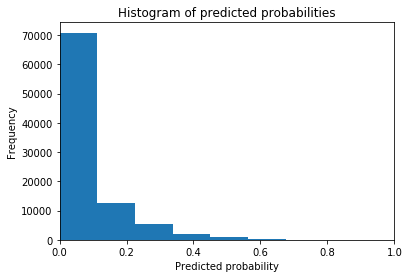

In [78]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')
plt.show()

### Compute ROC Curve 

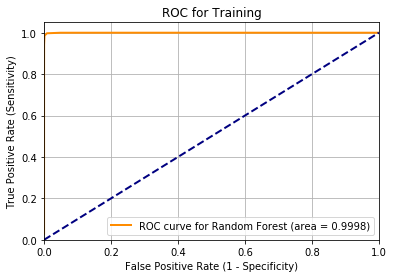

In [79]:
fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for Random Forest (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Training')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

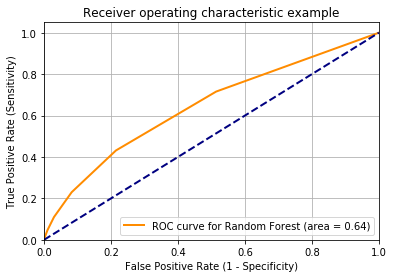

In [80]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### We have overfitting with Random Forest 

In [81]:
RandClassifier= RandomForestClassifier(n_estimators=10,max_depth=10,min_samples_leaf=10,random_state=0)
start=time.time()
RandClassifier.fit(X_train, y_train)
end=time.time()
y_pred=RandClassifier.predict(X_test)
y_pred_prob=RandClassifier.predict_proba(X_test)[:, 1]
y_train_pred_prob=RandClassifier.predict_proba(X_train)[:, 1]
print('Total elapsed time is:', round(end-start,4),' sec')
print('Correct accuracy of the train set with Random Forest Classifier is:', round(RandClassifier.score(X_train,y_train)*100,4),'%')
print('Correct accuracy of the test set with Random Forest Classifier is:', round(RandClassifier.score(X_test,y_test)*100,4),'%')
print('')
start=time.time()
RandScores = cross_val_score(RandClassifier, X, y, cv=5)
end=time.time()
print('Random Forest score Mean with cross val is:',round(np.mean(RandScores)*100,4),'%')
print('Total elapsed time is:', round(end-start,4),' sec')
print('')
print('Confusion Matrix is:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Random Forest log_loss is:',round(log_loss(y_test, y_pred),4))
average_precision = average_precision_score(y_test, y_pred)
print('')
print('Average precision-recall score: {0:0.4f}'.format(average_precision))

Total elapsed time is: 9.5289  sec
Correct accuracy of the train set with Random Forest Classifier is: 91.9235 %
Correct accuracy of the test set with Random Forest Classifier is: 91.9428 %

Random Forest score Mean with cross val is: 91.9283 %
Total elapsed time is: 27.0522  sec

Confusion Matrix is:
[[84820     0]
 [ 7433     0]]

Random Forest log_loss is: 2.7829

Average precision-recall score: 0.0806


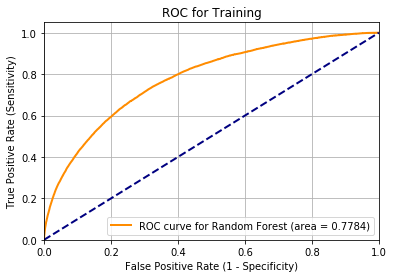

In [82]:
fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for Random Forest (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Training')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

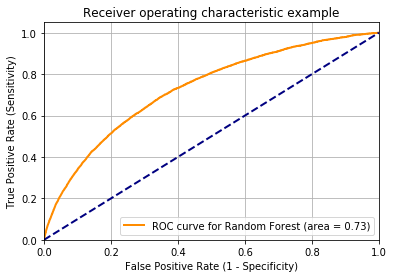

In [83]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## 3. Gradient Boosting Classifier

In [84]:
GradClassifier = GradientBoostingClassifier()
start=time.time()
GradClassifier.fit(X_train, y_train)
end=time.time()
y_pred=GradClassifier.predict(X_test)
y_pred_prob=GradClassifier.predict_proba(X_test)[:, 1]
y_train_pred_prob=GradClassifier.predict_proba(X_train)[:, 1]
print('Total elapsed time is:', round(end-start,4),' sec')
print('Correct accuracy of the train set with Gradient Boosting Classifier is:', round(GradClassifier.score(X_train,y_train)*100,4),'%')
print('Correct accuracy of the test set with Gradient Boosting Classifier is:', round(GradClassifier.score(X_test,y_test)*100,4),'%')
print('')
start=time.time()
GradScores = cross_val_score(GradClassifier, X, y, cv=5)
end=time.time()
print('Gradient boosting score Mean with cross val is:',round(np.mean(GradScores)*100,4),'%')
print('Total elapsed time is:', round(end-start,4),' sec')
print('')
print('Confusion Matrix is:')
print(confusion_matrix(y_test, y_pred))
print('')
print('GradClassifier log_loss is:',round(log_loss(y_test, y_pred),4))
average_precision = average_precision_score(y_test, y_pred)
print('')
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.4f}'.format(average_precision))


Total elapsed time is: 109.1597  sec
Correct accuracy of the train set with Gradient Boosting Classifier is: 91.9686 %
Correct accuracy of the test set with Gradient Boosting Classifier is: 91.9623 %

Gradient boosting score Mean with cross val is: 91.94 %
Total elapsed time is: 621.548  sec

Confusion Matrix is:
[[84734    86]
 [ 7329   104]]

GradClassifier log_loss is: 2.7761

Average precision-recall score: 0.0871


#### Histogram of predicted probabilities

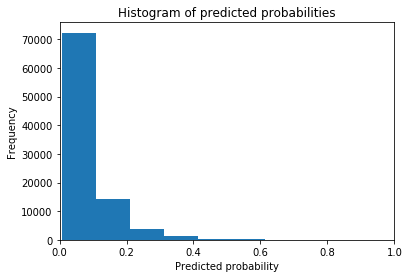

In [85]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')
plt.show()

### Compute ROC Curve 

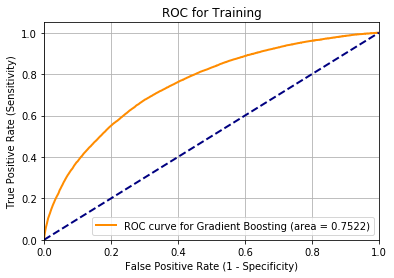

In [86]:
fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for Gradient Boosting (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Training')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

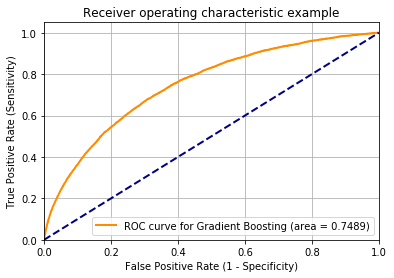

In [87]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for Gradient Boosting (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Gradinet boosting was the best method so far

#### Feature Importance with GB

In [88]:
feature_importance =GradClassifier.feature_importances_
#make importances relative to max importance
FeaturesImp=100.0 * (feature_importance / feature_importance.max())
print(FeaturesImp[:20])
print('')
print(np.argsort(FeaturesImp[:20]))

[ 96.43083076 100.          49.36433783  11.82758679   0.36422023
  11.09693344  14.62166664  24.087275    26.00342604   0.
   0.23126863  26.52312271   7.83249529   9.31512898   1.04611238
   5.63761177   0.          16.64857761  38.044146     1.22699434]

[ 9 16 10  4 14 19 15 12 13  5  3  6 17  7  8 11 18  2  0  1]


### Gradient Boosting with 20 selected features

In [89]:
X=Train.drop('TARGET',axis=1).iloc[:,list(np.argsort(FeaturesImp[:20]))]
y=Train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

GradClassifier = GradientBoostingClassifier()
start=time.time()
GradClassifier.fit(X_train, y_train)
end=time.time()
y_pred=GradClassifier.predict(X_test)
y_pred_prob=GradClassifier.predict_proba(X_test)[:, 1]
y_train_pred_prob=GradClassifier.predict_proba(X_train)[:, 1]
print('Total elapsed time is:', round(end-start,4),' sec')
print('Correct accuracy of the train set with Gradient Boosting Classifier is:', round(GradClassifier.score(X_train,y_train)*100,4),'%')
print('Correct accuracy of the test set with Gradient Boosting Classifier is:', round(GradClassifier.score(X_test,y_test)*100,4),'%')
print('')
start=time.time()
GradScores = cross_val_score(GradClassifier, X, y, cv=5)
end=time.time()
print('Gradient boosting score Mean with cross val is:',round(np.mean(GradScores)*100,4),'%')
print('Total elapsed time is:', round(end-start,4),' sec')
print('')
print('Confusion Matrix is:')
print(confusion_matrix(y_test, y_pred))
print('')
print('GradClassifier log_loss is:',round(log_loss(y_test, y_pred),4))
average_precision = average_precision_score(y_test, y_pred)
print('')
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.4f}'.format(average_precision))


Total elapsed time is: 68.4082  sec
Correct accuracy of the train set with Gradient Boosting Classifier is: 91.9579 %
Correct accuracy of the test set with Gradient Boosting Classifier is: 91.9461 %

Gradient boosting score Mean with cross val is: 91.9316 %
Total elapsed time is: 431.7934  sec

Confusion Matrix is:
[[84739    81]
 [ 7349    84]]

GradClassifier log_loss is: 2.7817

Average precision-recall score: 0.0854


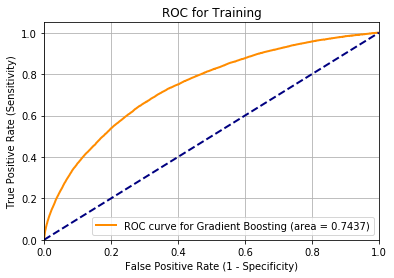

In [90]:
fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for Gradient Boosting (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Training')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

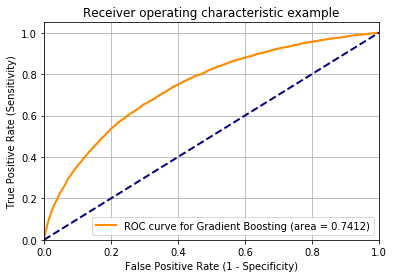

In [91]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for Gradient Boosting (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## 5. Adaboost Classifier

In [92]:
Train=df
X=Train.drop('TARGET',axis=1)
y=Train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

AB =AdaBoostClassifier()
start=time.time()
AB.fit(X_train, y_train)
y_pred=AB.predict(X_test)
end=time.time()
y_pred_prob=AB.predict_proba(X_test)[:, 1]
y_train_pred_prob=AB.predict_proba(X_train)[:, 1]
print('Total elapsed time is:', round(end-start,4),' sec')
print('Correct accuracy of the train set with Adaboost Classifier is:', round(AB.score(X_train,y_train)*100,4),'%')
print('Correct accuracy of the test set with Adaboost Classifier is:', round(AB.score(X_test,y_test)*100,4),'%')
print('')
start=time.time()
ABScores = cross_val_score(AB, X, y, cv=5)
end=time.time()
print('Gradient boosting score Mean with cross val is:',round(np.mean(ABScores)*100,4),'%')
print('Total elapsed time is:', round(end-start,4),' sec')
print('')
print('Confusion Matrix is:')
print(confusion_matrix(y_test, y_pred))
print('')
print('GradClassifier log_loss is:',round(log_loss(y_test, y_pred),4))
average_precision = average_precision_score(y_test, y_pred)
print('')
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.4f}'.format(average_precision))

Total elapsed time is: 31.9006  sec
Correct accuracy of the train set with Adaboost Classifier is: 91.9323 %
Correct accuracy of the test set with Adaboost Classifier is: 91.9515 %

Gradient boosting score Mean with cross val is: 91.9143 %
Total elapsed time is: 230.4193  sec

Confusion Matrix is:
[[84702   118]
 [ 7307   126]]

GradClassifier log_loss is: 2.7799

Average precision-recall score: 0.0880


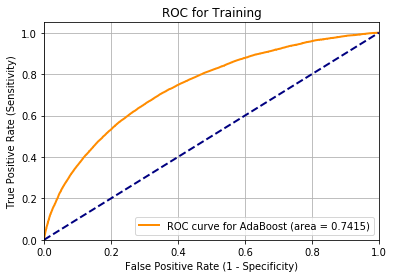

In [93]:
fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for AdaBoost (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Training')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

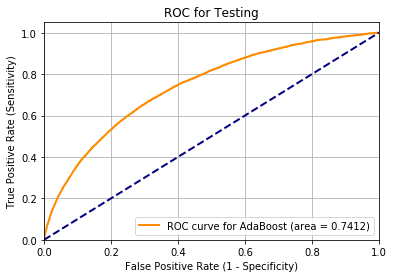

In [94]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for AdaBoost (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Testing')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Adaboost classifier with 20 selected features

In [95]:
X=Train.drop('TARGET',axis=1).iloc[:,list(np.argsort(FeaturesImp[:20]))]
y=Train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

AB =AdaBoostClassifier()
start=time.time()
AB.fit(X_train, y_train)
end=time.time()
y_pred=AB.predict(X_test)
y_pred_prob=AB.predict_proba(X_test)[:, 1]
y_train_pred_prob=AB.predict_proba(X_train)[:, 1]
print('Total elapsed time is:', round(end-start,4),' sec')
print('Correct accuracy of the train set with Adaboost Classifier is:', round(AB.score(X_train,y_train)*100,4),'%')
print('Correct accuracy of the test set with Adaboost Classifier is:', round(AB.score(X_test,y_test)*100,4),'%')
print('')
start=time.time()
ABScores = cross_val_score(AB, X, y, cv=5)
end=time.time()
print('Adaboost score Mean with cross val is:',round(np.mean(ABScores)*100,4),'%')
print('Total elapsed time is:', round(end-start,4),' sec')
print('')
print('Confusion Matrix is:')
print(confusion_matrix(y_test, y_pred))
print('')
print('GradClassifier log_loss is:',round(log_loss(y_test, y_pred),4))
average_precision = average_precision_score(y_test, y_pred)
print('')
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.4f}'.format(average_precision))

Total elapsed time is: 39.407  sec
Correct accuracy of the train set with Adaboost Classifier is: 91.9291 %
Correct accuracy of the test set with Adaboost Classifier is: 91.9276 %

Adaboost score Mean with cross val is: 91.9179 %
Total elapsed time is: 177.9843  sec

Confusion Matrix is:
[[84688   132]
 [ 7315   118]]

GradClassifier log_loss is: 2.7881

Average precision-recall score: 0.0868


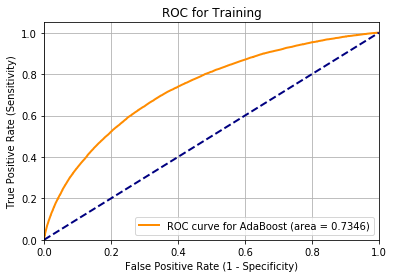

In [96]:
fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for AdaBoost (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Training')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

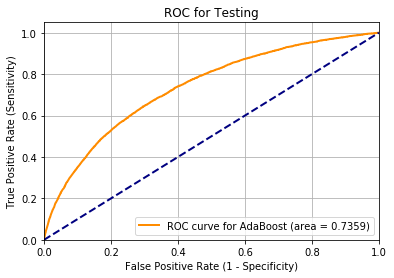

In [97]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for AdaBoost (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Testing')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## 6. Multi-layer Perceptron Classifier

In [99]:
Train=df
X=Train.drop('TARGET',axis=1)
y=Train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 


MLP= MLPClassifier()
start=time.time()
MLP.fit(X_train, y_train)
end=time.time()
y_pred=MLP.predict(X_test)
y_pred_prob=MLP.predict_proba(X_test)[:, 1]
y_train_pred_prob=MLP.predict_proba(X_train)[:, 1]
print('Total elapsed time is:', round(end-start,4),' sec')
print('Correct accuracy of the train set with Multi-Layer Perceptron Classifier is:', round(MLP.score(X_train,y_train)*100,4),'%')
print('Correct accuracy of the test set with Multi-Layer Perceptron Classifier is:', round(MLP.score(X_test,y_test)*100,4),'%')
print('')
print('Confusion Matrix is:')
print(confusion_matrix(y_test, y_pred))
print('')
start=time.time()
MLPScores = cross_val_score(MLP, X, y, cv=5)
end=time.time()
print('MLP score Mean with cross val is:',round(np.mean(MLPScores)*100,4),'%')
print('Total elapsed time is:', round(end-start,4),' sec')
print('')



print('MultiLayer Perceptron log_loss is:',round(log_loss(y_test, y_pred),4))
average_precision = average_precision_score(y_test, y_pred)
print('')
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.4f}'.format(average_precision))

Total elapsed time is: 86.0783  sec
Correct accuracy of the train set with Multi-Layer Perceptron Classifier is: 91.9797 %
Correct accuracy of the test set with Multi-Layer Perceptron Classifier is: 91.9363 %

Confusion Matrix is:
[[84685   135]
 [ 7304   129]]

MLP score Mean with cross val is: 90.7521 %
Total elapsed time is: 87.0049  sec

MultiLayer Perceptron log_loss is: 2.7851

Average precision-recall score: 0.0877


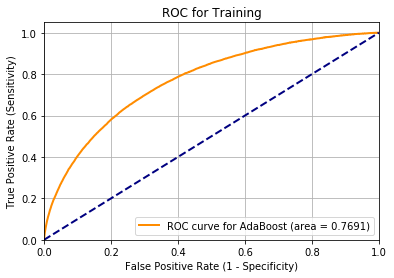

In [100]:
fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for AdaBoost (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Training')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

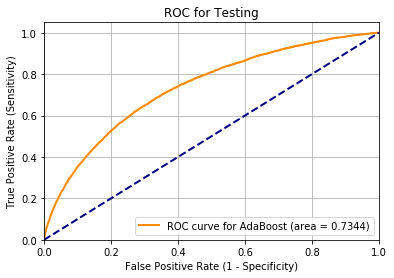

In [101]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve for AdaBoost (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Testing')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Conclusion

| Classifier |AUC Train | AUC Test | Log Loss Score |Precision-Recall Score | Elapsed Time |
| --- | --- | --- |  | | |
| Logistic Regression | 0.7372| 0.74 | 2.787| 0.0834| 9.6209 sec|
| Random Forest 1 | 0.9998| 0.65 | 2.8233| 0.0851| 12.6982  sec|
| Random Forest 2| 0.7784 |0.73  | 2.7829| 0.0806|**7.5475  sec** |
| Gradient Boosting 1| **0.7522** | **0.7489** | **2.7761**| **0.0871** |74.8086  sec|
| Gradient Boosting 2| 0.7437 | 0.7412 | 2.7817| 0.0854|55.7927  sec |
| Adaboost 1| 0.7415 |0.7412  | 2.7799| 0.088|26.8521  sec |
| Adaboost 2| 0.7346 |0.7359  | 2.7881| 0.0868| 19.7802  sec|
| Multilayer Perceptron| 0.7621 |0.7342  | 2.7862| 0.0846| 106.4788  sec|



- All classifiers are working very close.
- The best result is from Gradient boosting, although it is slow compare to random forest and logistic regression.
- The fastet classifer is Random forest with tuned parameters.